02. Entrenamiento

Se inicia con la importación de las diferentes librerias y aquí también se pone la ruta de la base de datos para que los resultados que nos entregue sean los entrenados. 

Aquí tenemos los códigos en python importantes
- data_loader.py
- model.py
- train.py

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r"C:/Users/ANA/Documents/Maestria/Clase Deeplearning/Taller entregable/Taller_prediction")



from src.data_loader import load_data

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam  


2. Cargue de los datos de entrenamiento. 

In [15]:
dataset_path = r"C:\Users\ANA\Documents\Maestria\Clase Deeplearning\Taller entregable\archive\House_Rent_Dataset.csv"
df = load_data(dataset_path)

X_train, X_test, y_train, y_test = load_data(dataset_path)

input_shape = X_train.shape[1]

Columnas disponibles en el dataset: ['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact']
Columnas disponibles en el dataset: ['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact']


3. Aquí nos encargamos de la división de datos de entrenamiento y prueba

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Definición de la Red por medio de la librería Tensorflow

In [17]:
model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)  
    ])
    

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


c:\Users\ANA\Documents\Maestria\Clase Deeplearning\Taller entregable\Taller_prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. Entrenamiento de la red 

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.5857 - mae: 0.3134 - val_loss: 0.4774 - val_mae: 0.3111
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9005 - mae: 0.3213 - val_loss: 0.4578 - val_mae: 0.2757
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3651 - mae: 0.2539 - val_loss: 0.4672 - val_mae: 0.3080
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.5771 - mae: 0.2777 - val_loss: 0.4556 - val_mae: 0.2671
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.5559 - mae: 0.2816 - val_loss: 0.4570 - val_mae: 0.2766
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.3501 - mae: 0.3118 - val_loss: 0.4471 - val_mae: 0.2806
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.6511 - mae: 0.2665 - val_loss: 0.4502 - val_mae: 0.2755
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6357 - mae: 0.2545 - val_loss: 0.4538 - val_mae: 0.2638
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - l

6. Evaluación del modelo. 

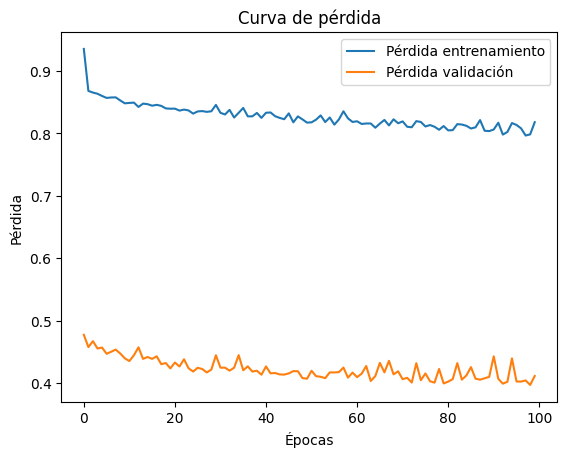

In [19]:
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de pérdida')
plt.show()
